# 모든 특징 유형이 같은 경우의 특징선택

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

# 데이터 로드 및 성능 확인

In [2]:
df = pd.read_csv("Sonar_Mines_Rocks.csv")
df.head()

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,...,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60,Y
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.010,0.018,0.024,0.032,0.016,0.010,0.008,R
3,0.010,0.017,0.062,0.020,0.020,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.008,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.010,0.011,0.002,0.007,0.005,0.011,0.009,R


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Band1   208 non-null    float64
 1   Band2   208 non-null    float64
 2   Band3   208 non-null    float64
 3   Band4   208 non-null    float64
 4   Band5   208 non-null    float64
 5   Band6   208 non-null    float64
 6   Band7   208 non-null    float64
 7   Band8   208 non-null    float64
 8   Band9   208 non-null    float64
 9   Band10  208 non-null    float64
 10  Band11  208 non-null    float64
 11  Band12  208 non-null    float64
 12  Band13  208 non-null    float64
 13  Band14  208 non-null    float64
 14  Band15  208 non-null    float64
 15  Band16  208 non-null    float64
 16  Band17  208 non-null    float64
 17  Band18  208 non-null    float64
 18  Band19  208 non-null    float64
 19  Band20  208 non-null    float64
 20  Band21  208 non-null    float64
 21  Band22  208 non-null    float64
 22  Ba

모든 특징이 연속형이다.

In [4]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

문자열 라벨을 숫자로 변경

In [5]:
Y.replace({"M":-1, "R":1}, inplace = True)

In [6]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [7]:
Train_X.shape # 샘플(156개) 대비 특징(60개)이 매우 많다. => 특징 선택 필요하다.

(156, 60)

## 성능확인

- 모든 feature가 연속형이므로 KNN 으로 성능 확인

In [8]:
# 특징 선택 전 성능 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)

from sklearn.metrics import f1_score
print(f1_score(Test_Y, pred_Y))

0.8076923076923077


현 상태로도 성능 자체가 나쁜편은 아니다.

# 특징 선택 

## 클래스 관련 척도 분류 표
---

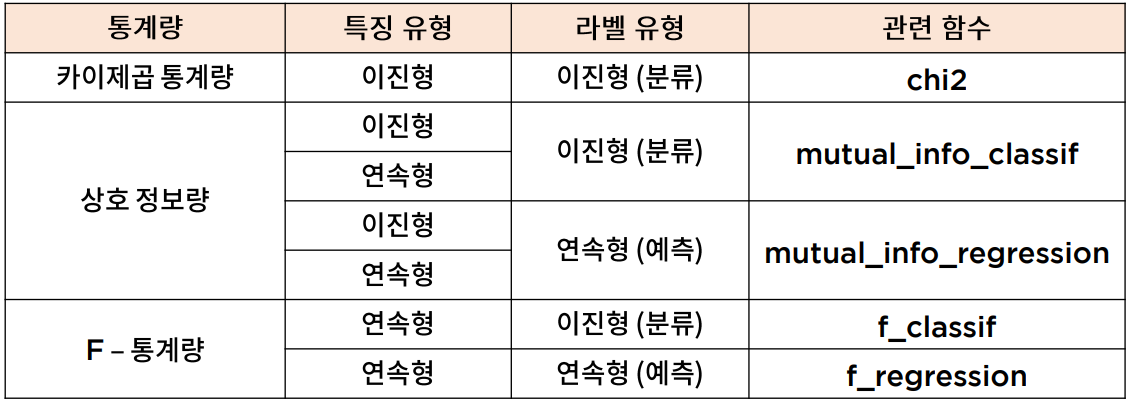

---
- 클래스 관련성 척도는 특징과 라벨의 유형에 따라 선택해야 한다.<br>
- 통계량의 수학적 이해를 하면 더 좋지만, 기본적으론 각 통계량이 의미하는 바를 이해 하는 게 우선이다.<br>
    - 1) 위의 통계량들은 특징과 라벨이 서로 얼마나 독립적이지 않은지를 나타낸다.<br>
    - 2) 또한, 얼마나 클래스와 관련이 있는지를 측정하는 지표이다.<br>
    - 3) 그리고 특징 유형과 라벨 유형에 따라 사용되는 통계량이 다르다는 점을 인지하는게중요

## 관련 함수 : sklearn.feature_selection.SelectKBest
---

**파라미터**
- scoring_func : 클래스 관련성 측정 함수 (e.g : chi2, mutual_info_classif, f_regression 등 위의 척도 분류표 참조)<br>
- k : 선택하는 특징의 개수<br>
    - 양수만 가능하다.<br>
    - 원래의 특징개수와 같거나 작아야 한다.<br>

**주요 메서드**<br>
- .fit, .transform, .fit_transform : 특징을 선택할때 사용<br>
- .get_support() : 선택된 특징의 인덱스를 return (뽑힌특징은 1 =True, 뽑히지 않은 특징은 0 = False) 인 bool type

**주요 속성** : scoring_func(X,Y) 의 결과물과 동일하다.<br>
- scores_ : scoring_func로 측정한 각 특징별 점수<br>
- pvalues_ : scoring_func 로 측정한 특징별 p-value (1에 가까울수록 독립적, 0에 가까울 수록 라벨과 관련서이 높다.)

In [9]:
# 특징 선택 수행
from sklearn.feature_selection import *

# select할 인스턴스 생성
# 선택 기준은 F-score
# feature은 연속형 , label은 이진형이기 때문
# 선택할 특징은 30개 (원본은 60개)
selector = SelectKBest(f_classif, k = 30)


# fitting
# feature 선택시에 X, Y 를 모두 고려
selector.fit(Train_X, Train_Y)

# 특징 선택
selected_features = Train_X.columns[selector.get_support()] #뽑힌 feature는 True(=1)로 return

# 선택된 각 특징을 Train/Test로 지정
s_Train_X = pd.DataFrame(selector.transform(Train_X), columns = selected_features)
s_Test_X = pd.DataFrame(selector.transform(Test_X), columns = selected_features)

# transform 쓰지않고 아래와 같이 입력할 수 도 있음
# s_Train_X = Train_X[selected_features]
# s_Test_X = Test_X[selected_features]

In [10]:
# 특징 선택 후 성능 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN().fit(s_Train_X, Train_Y)
pred_Y = model.predict(s_Test_X)

from sklearn.metrics import f1_score
print(f1_score(Test_Y, pred_Y))

0.8


- 특징을 절반으로 줄였는데, 성능의 차이가 크게 발생하지 않는다.<br>
- KNN은 특징이 많으면 분석 시간이 오래 걸리는 모델이다.<br>
- 더 적은 특징으로 동일한 or 더 좋은 성능을 낼 수 있다면 특징선택을 하는 것이 옳다.<br>
- 다만, 위에서 처럼 임의로 k값을 정하기보다, 아래와 같이 튜닝을 통해 최적값을 찾을 수 있다면 더 좋을 것이다.

# 특징개수 튜닝하기

In [11]:
# 특징 개수 튜닝
best_score = 0 # f-score의 최소값

# k = 5부터 50까지 5식 증가한 값의 list
for k in range(5, 50, 5):    
    selector = SelectKBest(f_classif, k = k)
    selector.fit(Train_X, Train_Y)
    selected_features = Train_X.columns[selector.get_support()]

    s_Train_X = pd.DataFrame(selector.transform(Train_X), columns = selected_features)
    s_Test_X = pd.DataFrame(selector.transform(Test_X), columns = selected_features)   
    
    model = KNN().fit(s_Train_X, Train_Y)
    pred_Y = model.predict(s_Test_X)
    score = f1_score(Test_Y, pred_Y)
    
    # 도출된 score가 기존의 best_score보다 높다면 update + 해당 k값 저장
    if score > best_score:
        best_score = score
        best_k = k
        best_features = selected_features

print(best_score, best_k)
print(best_features)

0.888888888888889 25
Index(['Band1', 'Band2', 'Band4', 'Band5', 'Band8', 'Band9', 'Band10',
       'Band11', 'Band12', 'Band13', 'Band20', 'Band21', 'Band22', 'Band36',
       'Band37', 'Band43', 'Band44', 'Band45', 'Band46', 'Band47', 'Band48',
       'Band49', 'Band51', 'Band52', 'Band54'],
      dtype='object')
